In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


csv_data = """Month,Store,Sales
Jan,Store A,12000
Jan,Store B,15000
Feb,Store A,18000
Feb,Store B,17000
Mar,Store A,16000
Mar,Store B,19000
"""


with open('sales_data.csv', 'w') as file:
    file.write(csv_data)

In [ ]:
df = pd.read_csv('sales_data.csv')
print("Full DataFrame:\n", df, "\n")

Full DataFrame:
   Month    Store  Sales
0   Jan  Store A  12000
1   Jan  Store B  15000
2   Feb  Store A  18000
3   Feb  Store B  17000
4   Mar  Store A  16000
5   Mar  Store B  19000 



In [ ]:
total_sales = df.groupby('Store')['Sales'].sum()
print("Total Sales Per Store:\n", total_sales, "\n")

Total Sales Per Store:
 Store
Store A    46000
Store B    51000
Name: Sales, dtype: int64 



In [ ]:
highest_store = total_sales.idxmax()
print(f"Store with higher total sales: {highest_store}\n")

Store with higher total sales: Store B



In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print("Monthly Total Sales:\n", monthly_sales, "\n")

Monthly Total Sales:
 Month
Feb    35000
Jan    27000
Mar    35000
Name: Sales, dtype: int64 



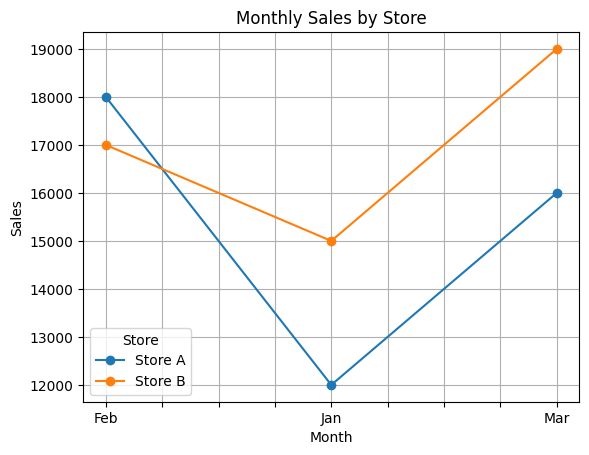

In [ ]:
pivot_df = df.pivot(index='Month', columns='Store', values='Sales')
pivot_df.plot(kind='line', marker='o')
plt.title('Monthly Sales by Store')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

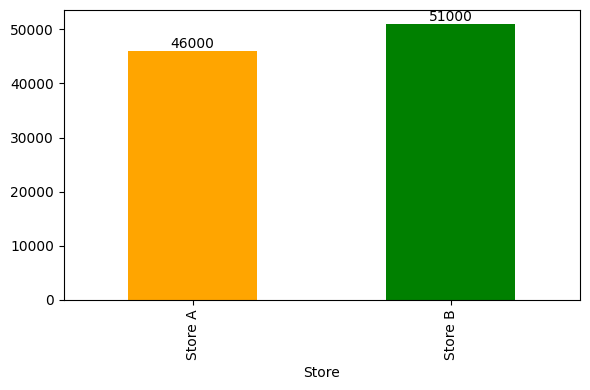

In [ ]:

ax = total_sales.plot(kind='bar', color=['orange', 'green'], figsize=(6,4))


for i, v in enumerate(total_sales):
    ax.text(i, v + 500, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()


In [22]:
import pandas as pd


csv_data = """Name,Age,Department,Salary
Aarav,28,Sales,50000
Sneha,,Engineering,80000
Kabir,25,HR,
Anaya,29,,60000
Rohan,35,Engineering,85000
"""

with open('employees_missing.csv','w') as file:
  file.write(csv_data)

df = pd.read_csv('employees_missing.csv')
print(df)


    Name   Age   Department   Salary
0  Aarav  28.0        Sales  50000.0
1  Sneha   NaN  Engineering  80000.0
2  Kabir  25.0           HR      NaN
3  Anaya  29.0          NaN  60000.0
4  Rohan  35.0  Engineering  85000.0


In [23]:
print(df.isnull())
print(df.isnull().sum())

    Name    Age  Department  Salary
0  False  False       False   False
1  False   True       False   False
2  False  False       False    True
3  False  False        True   False
4  False  False       False   False
Name          0
Age           1
Department    1
Salary        1
dtype: int64


In [26]:
df_cleaned = df.dropna()
print(df_cleaned)

    Name   Age   Department   Salary
0  Aarav  28.0        Sales  50000.0
4  Rohan  35.0  Engineering  85000.0


In [27]:
df['Age']=df['Age'].fillna(df['Age'].mean())
print(df)

    Name    Age   Department   Salary
0  Aarav  28.00        Sales  50000.0
1  Sneha  29.25  Engineering  80000.0
2  Kabir  25.00           HR      NaN
3  Anaya  29.00          NaN  60000.0
4  Rohan  35.00  Engineering  85000.0


In [28]:
df['Department']=df['Department'].fillna("unknowm")
print(df)

    Name    Age   Department   Salary
0  Aarav  28.00        Sales  50000.0
1  Sneha  29.25  Engineering  80000.0
2  Kabir  25.00           HR      NaN
3  Anaya  29.00      unknowm  60000.0
4  Rohan  35.00  Engineering  85000.0


In [29]:
df['Salary']=df['Salary'].fillna(0)
print(df)

    Name    Age   Department   Salary
0  Aarav  28.00        Sales  50000.0
1  Sneha  29.25  Engineering  80000.0
2  Kabir  25.00           HR      0.0
3  Anaya  29.00      unknowm  60000.0
4  Rohan  35.00  Engineering  85000.0
